In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/heart_disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
X=data.drop("target",axis=1)
y=data['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
X_train.shape

(242, 13)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(32 ,activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(16 ,activation="relu"))
model.add(Dense(8 ,activation="relu"))
model.add(Dense(1 ,activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


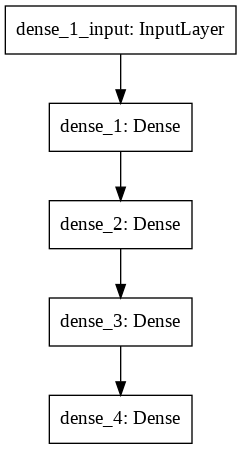

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(0.001)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics =["accuracy"])

In [ ]:
# cb = keras.callbacks.EarlyStopping(monitor="val_loss",mode="min")
history = model.fit(X_train ,y_train, epochs=200, batch_size=10, verbose=1, validation_split=0.2)

Epoch 1/200
20/20 [==============================] - 0s 4ms/step - loss: 0.1615 - accuracy: 0.9378 - val_loss: 1.1493 - val_accuracy: 0.7755
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9637 - val_loss: 1.1220 - val_accuracy: 0.7347
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1483 - accuracy: 0.9326 - val_loss: 0.8475 - val_accuracy: 0.7959
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9171 - val_loss: 0.8933 - val_accuracy: 0.7347
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1359 - accuracy: 0.9430 - val_loss: 0.7492 - val_accuracy: 0.7959
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.9223 - val_loss: 1.1913 - val_accuracy: 0.7551
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9275 - val_loss: 1.5156 - val_accuracy: 0.7347
Epoch 8/200
2

In [ ]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 1ms/step - loss: 3.0041 - accuracy: 0.7213


[3.004085063934326, 0.7213114500045776]

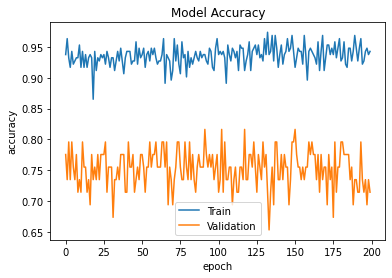

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'])
plt.show()

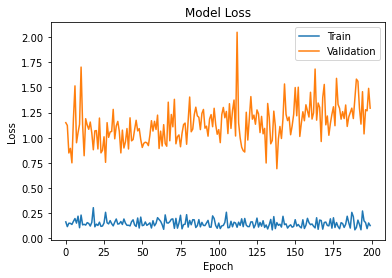

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Validation'])
plt.show()